#Start

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1
Num GPUs Available:  1


In [4]:
import os
from google.colab import drive

root = "/content/drive" 
drive.mount(root)
files_path = '/content/drive/My Drive/Data EEG/' 
!ls 
os.chdir(files_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [5]:
!ls ${root_path}

'New Text Document.txt'   S018R14.mat   S036R14.mat   S054R14.mat   S072R14.mat
 S001R14.mat		  S019R14.mat   S037R14.mat   S055R14.mat   S073R14.mat
 S002R14.mat		  S020R14.mat   S038R14.mat   S056R14.mat   S074R14.mat
 S003R14.mat		  S021R14.mat   S039R14.mat   S057R14.mat   S075R14.mat
 S004R14.mat		  S022R14.mat   S040R14.mat   S058R14.mat   S076R14.mat
 S005R14.mat		  S023R14.mat   S041R14.mat   S059R14.mat   S077R14.mat
 S006R14.mat		  S024R14.mat   S042R14.mat   S060R14.mat   S078R14.mat
 S007R14.mat		  S025R14.mat   S043R14.mat   S061R14.mat   S079R14.mat
 S008R14.mat		  S026R14.mat   S044R14.mat   S062R14.mat   S080R14.mat
 S009R14.mat		  S027R14.mat   S045R14.mat   S063R14.mat   S081R14.mat
 S010R14.mat		  S028R14.mat   S046R14.mat   S064R14.mat   S082R14.mat
 S011R14.mat		  S029R14.mat   S047R14.mat   S065R14.mat   S083R14.mat
 S012R14.mat		  S030R14.mat   S048R14.mat   S066R14.mat   S084R14.mat
 S013R14.mat		  S031R14.mat   S049R14.mat   S067R14.mat   S085R14.mat
 S014R14.m

In [ ]:
#Preparing the place where we will save the data
from random import randint
value = str(randint(1000,10000))
import datetime
now = datetime.datetime.now()
now1=now.strftime("%Y-%m-%d")
currentseed=value+"-"+now1
print(currentseed)


main_dict={"help":"Here we will add some descriptiom","path_input":["/content/drive/My Drive/matlab/filterlarger/","alsohere"],"path_model":["/content/drive/My Drive/matlab/filterlarger/models/"],
           "path_logs":["/content/drive/My Drive/matlab/filterlarger/logs/"], "path_reports":["/content/drive/My Drive/matlab/filterlarger/reports/"],
           "path_plots":["/content/drive/My Drive/matlab/filterlarger/plots/"],
           "current_seed":currentseed}
help=["first key is the help"]
main_dict["path_input"][0]
main_dict.keys()

2461-2020-10-06


dict_keys(['help', 'path_input', 'path_model', 'path_logs', 'path_reports', 'path_plots', 'current_seed'])

# Connect to Github

In [8]:
# Clone github repository setup
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/4 models' 
# replace with your Github username 
GIT_USERNAME = "psyryuvok" 
# definitely replace with your
GIT_TOKEN = ""  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "DeepModel_Classify_EEG" 

PROJECT_PATH = join(root, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path 
!mkdir "{PROJECT_PATH}"    

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive/My Drive/Colab Notebooks/4 models
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/4 models’: File exists
GIT_PATH:  https://bce6ac9831ee2cdb67dca6960adcc39684e80a75@github.com/psyryuvok/DeepModel_Classify_EEG.git


In [18]:
os.chdir(join(PROJECT_PATH,GIT_REPOSITORY))
!ls

DeepModel_Classify_EEG.ipynb  LICENSE  README.md


In [19]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    4_models (1).ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	DeepModel_Classify_EEG.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:

!git add .
!git commit -m "Adding notebook"
!git push origin main

#Create report

##Reportlab in progress

In [ ]:
!pip install reportlab
!pip install svglib

     |████████████████████████████████| 2.6MB 6.3MB/s 
     |████████████████████████████████| 901kB 5.9MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Created wheel for svglib: filename=svglib-1.0.0-cp36-none-any.whl size=26843 sha256=5182a9db312a005c16b28575f66df754546e8b0daf6caf56c5c69755b091da17
  Stored in directory: /root/.cache/pip/wheels/e5/8e/78/7c1c7a612f8a87139b1b087b68c2c941976c2f24e1c0259cbb
Successfully built svglib


In [ ]:
import time
from reportlab.lib.enums import TA_JUSTIFY
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch


outfilename = main_dict["current_seed"]+"form_letter.pdf"
outfiledir = main_dict["path_reports"][0]
outfilepath = os.path.join( outfiledir, outfilename )


doc = SimpleDocTemplate(outfilepath,pagesize=letter,
                        rightMargin=72,leftMargin=72,
                        topMargin=72,bottomMargin=18)
Story=[]
#logo = "python_logo.png"
magName = "Pythonista"
issueNum = 12
subPrice = "99.00"
limitedDate = "03/05/2010"
freeGift = "tin foil hat"
formatted_time = time.ctime()
full_name = "Tesnorflow 4 CNN+ Dense"
address_parts = ["Enjoy", "reading, sir."]
styles=getSampleStyleSheet()
styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))
ptext = '<font size="12">%s</font>' % formatted_time
Story.append(Paragraph(ptext, styles["Normal"]))
Story.append(Spacer(1, 12))
# Create return address
ptext = '<font size="12">%s</font>' % full_name
Story.append(Paragraph(ptext, styles["Normal"]))       
for part in address_parts:
    ptext = '<font size="12">%s</font>' % part.strip()
    Story.append(Paragraph(ptext, styles["Normal"]))   
Story.append(Spacer(1, 12))


ptext = '<font size="12">Thank you very much and we look forward to serving you.</font>'
Story.append(Paragraph(ptext, styles["Justify"]))
Story.append(Spacer(1, 12))


from reportlab.lib.units import inch
from reportlab.platypus import Table, TableStyle

# assuming image1, image2, image3 are your images. change colWidths and rowHeights 
# as needed

chart_style = TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                          ('VALIGN', (0, 0), (-1, -1), 'CENTER')])


"""
logo = "foo.png"
im = Image(logo, 3*inch, 3*inch)
logo = "foo1.png"
im1 = Image(logo, 3*inch, 3*inch)
logo = "foo2.png"
im2 = Image(logo, 3*inch, 3*inch)
logo = "foo3.png"
im3 = Image(logo, 3*inch, 3*inch)

Story.append(Table([[im,im3]],
                     colWidths=[3 * inch, 3 * inch, 3 * inch],
                     rowHeights=[3 * inch], style=chart_style))

Story.append(Table([[ im1, im2]],
                     colWidths=[3 * inch, 3 * inch, 3 * inch],
                     rowHeights=[3 * inch], style=chart_style))
"""

logo=main_dict["path_plots"][0]+main_dict["current_seed"]+"_TotalLosss.png"
im = Image(logo, 7*inch, 3*inch)
Story.append(im)
logo=main_dict["path_plots"][0]+main_dict["current_seed"]+"_losses.png"
im = Image(logo, 5*inch, 5*inch)
Story.append(im)
logo=main_dict["path_plots"][0]+main_dict["current_seed"]+"_accs.png"
im = Image(logo, 8*inch, 8*inch)
Story.append(im)




#####Un tabel cu valorile modelului
from reportlab.lib import colors
chart_style3 = TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER'), 
                          ('VALIGN', (0, 0), (-1, -1), 'TOP'),
                          ('BACKGROUND',(0,0),(-1,-1),colors.green),
                          ('GRID',(0,1),(-1,-1),2,colors.black),
                          ('TEXTCOLOR',(0,0),(-1,0),colors.whitesmoke),
                          ('TEXTCOLOR',(0,0),(0,-1),colors.whitesmoke)
                           ])
"""
listT=[]
import math
for indx1,indx2 in enumerate(list_output):
  listTemp=[]
  listTemp.append(indx2)
  for i,j in enumerate(MetricNames):
    if i<indx1*3:
      pass
    else:
      listTemp.append(round(max(H.history[j])*100,2))
      listTemp.append(round(max(H.history["val_" + j])*100,2))
      tempMean=H.history[j]
      tempMean=round(np.mean(tempMean[math.floor(len(tempMean)*0.8):])*100,2)
      listTemp.append(tempMean)
      tempMean=H.history["val_" + j]
      tempMean=round(np.mean(tempMean[math.floor(len(tempMean)*0.8):])*100,2)
      listTemp.append(tempMean)
    if 2+indx1*3==i:
      break
  listT.append(listTemp)
"""

listT=[]
listTemp1=[]
import math
for indx1,indx2 in enumerate(list_output):
  listTemp=[]
  listTemp.append(indx2)
 
  for i,j in enumerate(MetricNames):
    if i<indx1*3:
      pass
    else:
      listTemp.append(round(max(H.history[j])*100,2))
      listTemp.append(round(max(H.history["val_" + j])*100,2))
      tempMean=H.history[j]
      tempMean=round(np.mean(tempMean[math.floor(len(tempMean)*0.8):])*100,2)
      listTemp.append(tempMean)
      tempMean=H.history["val_" + j]
      tempMean=round(np.mean(tempMean[math.floor(len(tempMean)*0.8):])*100,2)
      listTemp.append(tempMean)
    if 2+indx1*3==i:
      break
  listT.append(listTemp)
listTemp1.append('')

#2*(i+1)+spacing
listTemp2=[]
for i in range(0,np.shape(unique)[0]+1):
  listTemp2.append(['N','V','RN','RV'])
  listTemp1.append(MetricNames[i][len(list_output[indx1])+1:])
  for j in range(0,3): 
    listTemp1.append('')

listT.insert(0,listTemp1)  
"""   
listT.insert(1,listTemp2)
"""
###########################################################################################################################################################################################
valuesTable=Table(listT,colWidths=40,style=chart_style3)

#Last minute change, add additional style
rowNumb=len(listT)
for i in range(1,rowNumb):
  if i % 2==0:
    bc=colors.burlywood
  else:
    bc=colors.beige
  print(5)
  ts=TableStyle(
      [('BACKGROUND',(1,i),(-1,i),bc)]
  )
  valuesTable.setStyle(ts)  
#another last minute change, and here we add merge cells for N V RN RV
"""
spacing=0
for i in range(1,np.shape(unique)[0]+1):
  ts=TableStyle([('SPAN', (i-(i-1)*2+spacing, 0), (4*i, 0))])
  spacing+=1
  valuesTable.setStyle(ts)
"""

"""
spacing=0
for i in range(1,np.shape(unique)[0]+1):
  ts=[('SPAN', (i-(i-1)*2+spacing, 0), (4*i, 0))]
  ts1.append(ts)
  spacing+=1

valuesTable.setStyle(TableStyle(ts1))
"""
ts=TableStyle([('SPAN', (1, 0), (4, 0)),
                 ('SPAN', (5, 0), (8, 0)),
                 ('SPAN', (9, 0), (12, 0) )])
valuesTable.setStyle(ts)

Story.append(valuesTable)
Story.append(Spacer(1, 20))



#ptext = '<font size="12">Dear %s:</font>' % full_name.split()[0].strip()
for i,name in enumerate(list_output):
  ptext = '<font size="12">Our max val acc for %s</font> is : %s' % (name,max(H.history["val_" +MetricNames [i+i*int(np.shape(unique)[0])]]))
  Story.append(Paragraph(ptext, styles["Normal"]))
  Story.append(Spacer(1, 12))


"""
ptext = '<font size="12">We would like to welcome you to our subscriber base for %s Magazine! \
        You will receive %s issues at the excellent introductory price of $%s. Please respond by\
        %s to start receiving your subscription and get the following free gift: %s.</font>' % (magName, 
                                                                                                issueNum,
                                                                                                subPrice,
                                                                                                limitedDate,
                                                                                                freeGift)
Story.append(Paragraph(ptext, styles["Justify"]))
Story.append(Spacer(1, 12))
ptext = '<font size="12">Thank you very much and we look forward to serving you.</font>'
Story.append(Paragraph(ptext, styles["Justify"]))
Story.append(Spacer(1, 12))
ptext = '<font size="12">Sincerely,</font>'
Story.append(Paragraph(ptext, styles["Normal"]))
Story.append(Spacer(1, 24))
"""
ptext = '<font size="20">Here is our summaries:</font>'
Story.append(Paragraph(ptext, styles["Normal"]))
Story.append(Spacer(1, 24))

"""

Story.append(Table([[ summar]],
                     colWidths=[7 * inch],
                     rowHeights=[9.5 * inch]))
"""


chart_style2 = TableStyle([('ALIGN', (0, 0), (-1,-1), 'LEFT'),
                          ('VALIGN', (0, 0), (-1,-1), 'TOP')])


#Adaugat model summary
import io
tmp_smry = io.StringIO()
model.summary(print_fn=lambda x: tmp_smry.write(x + '\n'))
summar = tmp_smry.getvalue()

import re
a = re.search(r'\b(Total)\b', summar)
print(a.start())
b = re.search(r'\b(Layer)\b', summar)
print(b.start())
first_row=b.start()-99
last_rows=len(summar)-a.start()
nr_rows=int(((len(summar)-last_rows-first_row)/99)+2)

for part in range(1,nr_rows):
  if part==1:
    row=summar[:first_row]
    Story.append(Table([[row]],colWidths=[8 * inch],rowHeights=[0.2 * inch], style=chart_style2))
  elif part<nr_rows-1:
    row=summar[(first_row+99*(part-1)):(first_row+99*part)]
    Story.append(Table([[row]],colWidths=[8 * inch],rowHeights=[0.2 * inch], style=chart_style2))
  else:
    row=summar[(first_row+99*(part-1)):(first_row+99*(part-1)+last_rows)] 
    Story.append(Table([[row]],colWidths=[8 * inch],rowHeights=[0.4 * inch], style=chart_style2))


logo = "model.png"
summary = Image(logo, 6*inch, 9*inch)
Story.append(summary)


doc.build(Story)





5
5
5
5
5
7540
115


In [ ]:
listTemp2=[]
for i in range(0,np.shape(unique)[0]+1):
  listTemp2.append(['N','V','RN','RV'])
  listTemp1.append(MetricNames[i][len(list_output[indx1])+1:])
  for j in range(0,3): 
    listTemp1.append('')

listT.insert(0,listTemp1)  

listT.insert(1,listTemp2)

###########################################################################################################################################################################################
valuesTable=Table(listT,colWidths=50,style=chart_style3)

#Last minute change, add additional style
rowNumb=len(listT)
for i in range(1,rowNumb):
  if i % 2==0:
    bc=colors.burlywood
  else:
    bc=colors.beige
  ts=TableStyle(
      [('BACKGROUND',(0,i),(-1,i),bc)]
  )
  valuesTable.setStyle(ts)  
#another last minute change, and here we add merge cells for N V RN RV
"""
#don't apply succsive setStyles of span. They overwrite sor something like that?????very strange, your middle value fucked up and went out of table
spacing=0
for i in range(1,np.shape(unique)[0]+1):
  ts=TableStyle([('SPAN', (i-(i-1)*2+spacing, 0), (4*i, 0))])
  spacing+=1
  valuesTable.setStyle(ts)
"""

ts1=[]
ts=[]
spacing=0
for i in range(1,np.shape(unique)[0]+2):
  ts=[('SPAN', (i+(i-1)*2+spacing, 0), (4*i, 0))]
  print((i+(i-1)*2+spacing))
  ts1.append(ts)
  spacing+=1
ts1=TableStyle(ts1)
valuesTable.setStyle(ts1)

Story.append(valuesTable)

In [ ]:
listT=[]
listTemp1=[]
import math
for indx1,indx2 in enumerate(list_output):
  listTemp=[]
  listTemp.append(indx2)
 
  for i,j in enumerate(MetricNames):
    if i<indx1*3:
      pass
    else:
      listTemp.append(round(max(H.history[j])*100,2))
      listTemp.append(round(max(H.history["val_" + j])*100,2))
      tempMean=H.history[j]
      tempMean=round(np.mean(tempMean[math.floor(len(tempMean)*0.8):])*100,2)
      listTemp.append(tempMean)
      tempMean=H.history["val_" + j]
      tempMean=round(np.mean(tempMean[math.floor(len(tempMean)*0.8):])*100,2)
      listTemp.append(tempMean)
    if 2+indx1*3==i:
      break
  listT.append(listTemp)
listTemp1.append('')


listTemp2=[]
for i in range(0,np.shape(unique)[0]+1):
  listTemp2.append(['N','V','RN','RV'])
  for j in range(0,4):
    listTemp1.append(MetricNames[i][len(list_output[indx1])+1:])
    
    
listT.insert(0,listTemp1)  
listT.insert(1,listTemp2)

print(listTemp)
print(listT)

['CNN4_output', 64.2, 68.89, 64.2, 68.89, 64.2, 68.89, 64.2, 68.89, 64.2, 68.89, 64.2, 68.89]
[['', 'categorical_accuracy', 'categorical_accuracy', 'categorical_accuracy', 'categorical_accuracy', 'precision', 'precision', 'precision', 'precision', 'recall', 'recall', 'recall', 'recall'], [['N', 'V', 'RN', 'RV'], ['N', 'V', 'RN', 'RV'], ['N', 'V', 'RN', 'RV']], ['CNN1_output', 51.6, 48.89, 51.6, 48.89, 51.6, 48.89, 51.6, 48.89, 51.6, 48.89, 51.6, 48.89], ['CNN2_output', 60.0, 51.11, 60.0, 51.11, 60.0, 51.11, 60.0, 51.11, 60.0, 51.11, 60.0, 51.11], ['CNN3_output', 64.69, 80.0, 64.69, 80.0, 64.69, 80.0, 64.69, 80.0, 64.69, 80.0, 64.69, 80.0], ['CNN4_output', 64.2, 68.89, 64.2, 68.89, 64.2, 68.89, 64.2, 68.89, 64.2, 68.89, 64.2, 68.89]]


##Pylatex report uncomplete

In [ ]:
!pip install pylatex
!sudo apt-get install texlive-latex-base
!sudo apt-get install texlive-fonts-recommended
!sudo apt-get install texlive-fonts-extra
!sudo apt-get install texlive-latex-extra

     |████████████████████████████████| 92kB 4.5MB/s eta 0:00:011
  Created wheel for pylatex: filename=PyLaTeX-1.3.1-cp36-none-any.whl size=42099 sha256=a1e1b21d1ccceb18d94e6c6a68bcb1a7751aa91d45608b0172f9f4efed3ca1e9
  Stored in directory: /root/.cache/pip/wheels/6b/10/69/55ef4aae198405eb5d1318974bd823850dec9adc9b0aba5a62
  Created wheel for ordered-set: filename=ordered_set-3.1.1-py2.py3-none-any.whl size=7813 sha256=b545188f425680fcc2042d76262061d583b67692da41ed745451378c62a82991
  Stored in directory: /root/.cache/pip/wheels/dd/70/f1/0a4953bd6d06e7dbffe8ef0197b558eaecb21fa6b043b50d73
Successfully built pylatex ordered-set
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-

In [ ]:
import numpy as np

from pylatex import Document, Section, Subsection, Tabular, Math, TikZ, Axis, \
    Plot, Figure, Matrix, Alignat
from pylatex.utils import italic
import os

if __name__ == '__main__':
    #image_filename = os.path.join(os.path.dirname(__file__), 'kitten.jpg')

    geometry_options = {"tmargin": "1cm", "lmargin": "10cm"}
    doc = Document(geometry_options=geometry_options)

    with doc.create(Section('The simple stuff')):
        doc.append('Some regular text and some')
        doc.append(italic('italic text. '))
        doc.append('\nAlso some crazy characters: $&#{}')
        with doc.create(Subsection('Math that is incorrect')):
            doc.append(Math(data=['2*3', '=', 9]))

        with doc.create(Subsection('Table of something')):
            with doc.create(Tabular('rc|cl')) as table:
                table.add_hline()
                table.add_row((1, 2, 3, 4))
                table.add_hline(1, 2)
                table.add_empty_row()
                table.add_row((4, 5, 6, 7))

    a = np.array([[100, 10, 20]]).T
    M = np.matrix([[2, 3, 4],
                   [0, 0, 1],
                   [0, 0, 2]])

    with doc.create(Section('The fancy stuff')):
        with doc.create(Subsection('Correct matrix equations')):
            doc.append(Math(data=[Matrix(M), Matrix(a), '=', Matrix(M * a)]))

        with doc.create(Subsection('Alignat math environment')):
            with doc.create(Alignat(numbering=False, escape=False)) as agn:
                agn.append(r'\frac{a}{b} &= 0 \\')
                agn.extend([Matrix(M), Matrix(a), '&=', Matrix(M * a)])

        with doc.create(Subsection('Beautiful graphs')):
            with doc.create(TikZ()):
                plot_options = 'height=4cm, width=6cm, grid=major'
                with doc.create(Axis(options=plot_options)) as plot:
                    plot.append(Plot(name='model', func='-x^5 - 242'))

                    coordinates = [
                        (-4.77778, 2027.60977),
                        (-3.55556, 347.84069),
                        (-2.33333, 22.58953),
                        (-1.11111, -493.50066),
                        (0.11111, 46.66082),
                        (1.33333, -205.56286),
                        (2.55556, -341.40638),
                        (3.77778, -1169.24780),
                        (5.00000, -3269.56775),
                    ]

                    plot.append(Plot(name='estimate', coordinates=coordinates))

    doc.generate_pdf('full', clean_tex=False, compiler='pdflatex')

In [ ]:
import numpy as np

from pylatex import Document, Section, Subsection, Table, Math, TikZ, Axis, \
    Plot, Figure, Package
from pylatex import Matrix
from pylatex.utils import italic, escape_latex

doc = Document()
doc.packages.append(Package('geometry', options=['tmargin=1cm',
                                                 'lmargin=10cm']))

with doc.create(Section('The simple stuff')):
    doc.append('Some regular text and some ' + italic('italic text. '))
    doc.append(escape_latex('\nAlso some crazy characters: $&#{}'))
    with doc.create(Subsection('Math that is incorrect')) as math:
        doc.append(Math(data=['2*3', '=', 9]))

    with doc.create(Subsection('Table of something')):
        with doc.create(Table('rc|cl')) as table:
            table.add_hline()
            table.add_row((1, 2, 3, 4))
            table.add_hline(1, 2)
            table.add_empty_row()
            table.add_row((4, 5, 6, 7))

               with doc.create(Subsection('Table of something')):
            with doc.create(Tabular('rc|cl')) as table:
                table.add_hline()
                table.add_row((1, 2, 3, 4))
                table.add_hline(1, 2)
                table.add_empty_row()
                table.add_row((4, 5, 6, 7))

a = np.array([[100, 10, 20]]).T
M = np.matrix([[2, 3, 4],
               [0, 0, 1],
               [0, 0, 2]])

with doc.create(Section('The fancy stuff')):
    with doc.create(Subsection('Correct matrix equations')):
        doc.append(Math(data=[Matrix(M), Matrix(a), '=', Matrix(M*a)]))

    with doc.create(Subsection('Beautiful graphs')):
        with doc.create(TikZ()):
            plot_options = 'height=6cm, width=6cm, grid=major'
            with doc.create(Axis(options=plot_options)) as plot:
                plot.append(Plot(name='model', func='-x^5 - 242'))

                coordinates = [
                    (-4.77778, 2027.60977),
                    (-3.55556, 347.84069),
                    (-2.33333, 22.58953),
                    (-1.11111, -493.50066),
                    (0.11111, 46.66082),
                    (1.33333, -205.56286),
                    (2.55556, -341.40638),
                    (3.77778, -1169.24780),
                    (5.00000, -3269.56775),
                ]

                plot.append(Plot(name='estimate', coordinates=coordinates))

    with doc.create(Subsection('Cute kitten pictures')):
        with doc.create(Figure(position='h!')) as kitten_pic:
            kitten_pic.add_image('docs/static/kitten.jpg', width='120px')
            kitten_pic.add_caption('Look it\'s on its back')

doc.generate_pdf()

#Prepare


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
#%matplotlib inline

from collections import defaultdict
rezultate=defaultdict(list)

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

r=0;
import glob
os.chdir("/content/drive/My Drive/Data EEG")
#with open("/drive/My Drive/matlab/filterlarger/S*.mat","r") as file_list:
for i in glob.glob("*.mat"):
  mat = scipy.io.loadmat(i)
  X_train=mat.get('RHR');
  size=len(X_train);
  y_train=np.ones(size);
  X_test=mat.get('RH');
  size=len(X_test);
  y_test=np.zeros(size);
  X=np.concatenate((X_train, X_test), axis=0)
  y=np.concatenate((y_train, y_test), axis=0)
  # encode class values as integers
  encoder = LabelEncoder()
  y2=y;
  encoder.fit(y2)
  encoder.fit(y)
  encoded_y = encoder.transform(y2)
  # convert integers to dummy variables (i.e. one hot encoded)
  y= to_categorical(encoded_y)
  r=r+1;
  if r<2:
    X1=X;
    y1=y;
    y3=y2;
  X1=np.concatenate((X1,X), axis=0)
  y1=np.concatenate((y1,y), axis=0)
  y3=np.concatenate((y3,y2), axis=0)
  if r==2:
    X5=X;
    y5=y;
  if r==4:
    X10=X;
    y10=y;
print(glob.glob("*.mat")) 
list(glob.glob("*.mat"))


X2=X1;
X2=X2+1;
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scalers = MinMaxScaler(feature_range=(0,1))
scalers= StandardScaler()
X1[1,:,:]=scalers.fit_transform(X1[1,:,:])
for i in range(X1.shape[0]-1):
    X3=X1[i+1,:,:]
    X3=scalers.transform(X3)
    X1[i+1,:, :]=X3
    


['S001R14.mat', 'S002R14.mat', 'S003R14.mat', 'S004R14.mat', 'S005R14.mat', 'S006R14.mat', 'S007R14.mat', 'S008R14.mat', 'S009R14.mat', 'S010R14.mat', 'S011R14.mat', 'S012R14.mat', 'S013R14.mat', 'S014R14.mat', 'S015R14.mat', 'S016R14.mat', 'S017R14.mat', 'S018R14.mat', 'S019R14.mat', 'S020R14.mat', 'S021R14.mat', 'S022R14.mat', 'S023R14.mat', 'S024R14.mat', 'S025R14.mat', 'S026R14.mat', 'S027R14.mat', 'S028R14.mat', 'S029R14.mat', 'S030R14.mat', 'S031R14.mat', 'S032R14.mat', 'S033R14.mat', 'S034R14.mat', 'S035R14.mat', 'S036R14.mat', 'S037R14.mat', 'S038R14.mat', 'S039R14.mat', 'S040R14.mat', 'S041R14.mat', 'S042R14.mat', 'S043R14.mat', 'S044R14.mat', 'S045R14.mat', 'S046R14.mat', 'S047R14.mat', 'S048R14.mat', 'S049R14.mat', 'S050R14.mat', 'S051R14.mat', 'S052R14.mat', 'S053R14.mat', 'S054R14.mat', 'S055R14.mat', 'S056R14.mat', 'S057R14.mat', 'S058R14.mat', 'S059R14.mat', 'S060R14.mat', 'S061R14.mat', 'S062R14.mat', 'S063R14.mat', 'S064R14.mat', 'S065R14.mat', 'S066R14.mat', 'S067R14.

range(0, 3930)
[[ 0.03277674  0.01708682  0.08718967 ... -0.33969589 -0.34910615
  -0.36845156]
 [-0.03517255 -0.03584427  0.01594831 ... -0.28610406 -0.37840189
  -0.41387004]
 [-0.19409231 -0.16388238 -0.15370365 ... -0.16643613 -0.43859591
  -0.50544444]
 ...
 [-0.05395865 -0.10764519  0.18593029 ... -0.34584328 -0.01989908
  -0.1811351 ]
 [-0.22452311 -0.24297595  0.02029521 ... -0.43801195 -0.25259639
  -0.47605783]
 [-0.11286429 -0.05446085  0.12425432 ... -0.38009018 -0.43507246
  -0.68973604]]
range(0, 3930)
[[-0.01780282 -0.01221762 -0.01501022 ...  0.0153593  -0.0083778
  -0.01291577]
 [-0.08656156 -0.06179376 -0.07330497 ...  0.0657552  -0.03732624
  -0.05472293]
 [-0.24737446 -0.18171639 -0.2121263  ...  0.17828676 -0.09680666
  -0.13901605]
 ...
 [-0.10557145 -0.1290437   0.06578639 ...  0.00957851  0.31692654
   0.15950675]
 [-0.27816776 -0.25579675 -0.06974803 ... -0.07709371  0.08698784
  -0.11196603]
 [-0.16517881 -0.07923036  0.01531872 ... -0.02262609 -0.09332498
  -

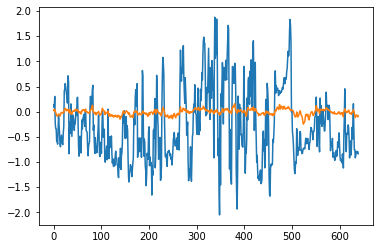

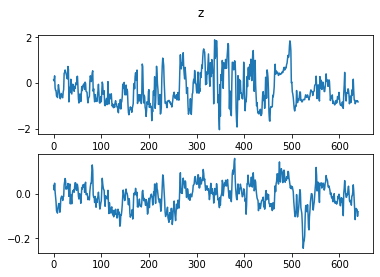

In [15]:
X2=X2-1;
print(range(X1.shape[0]-1))
print(X1[2,:,:])

print(range(X2.shape[0]-1))
print(X2[2,:,:])

import matplotlib.pyplot as plt
plt.plot(X1[1,1,:])

plt.plot(X2[1,1,:])
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('z')
ax1.plot(X1[1,1,:])
ax2.plot(X2[1,1,:])
# Add a channels dimension
#X2=X2.reshape(len(X2),64,640,1)
#X1=X1.reshape(len(X1),64,640,1)
#or this
#X2 = X2[..., tf.newaxis]
#X1 = X1[..., tf.newaxis]

In [16]:
# split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.10)

inputss=0

inputss=np.shape(X_train[:,:,:,np.newaxis])
print((inputss[1:]))

inp=inputss[1:]

inp=str(inp).replace(',', '')
#inp=''.join(inp)
print((inp))

# Shuffle
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, {"output_1":y_train,"output_2":y_train,"output_3":y_train,"output_4":y_train})).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, {"output_1":y_test,"output_2":y_test,"output_3":y_test,"output_4":y_test})).batch(32)

(64, 640, 1)
(64 640 1)


#Functional model

In [ ]:
tf.executing_eagerly()

True

In [ ]:
#Checking our vram
!nvidia-smi
!ps -aux|grep python

Thu Nov  5 13:36:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#In case you need to remove
!kill 119

##Functional model first attempt
Now using static classes

Model: "neurak"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
motor_imagery (InputLayer)      [(None, 64, 640, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 64, 631, 50)  550         motor_imagery[0][0]              
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 43, 631, 50)  55050       conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 64, 621, 50)  1050        motor_imagery[0][0]              
_____________________________________________________________________________________________

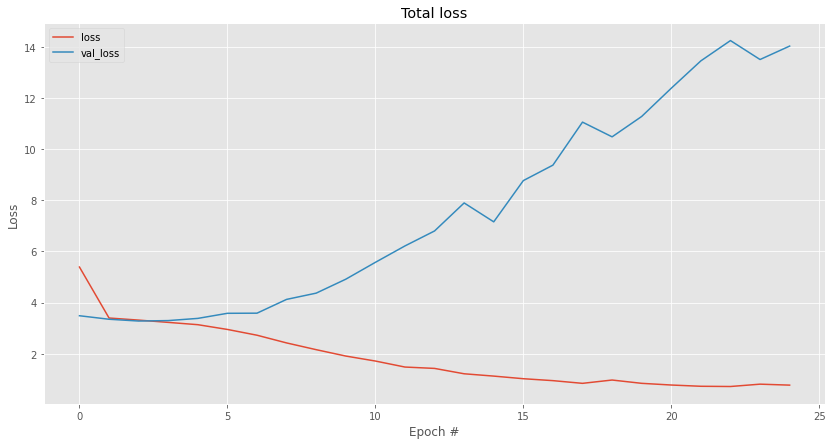

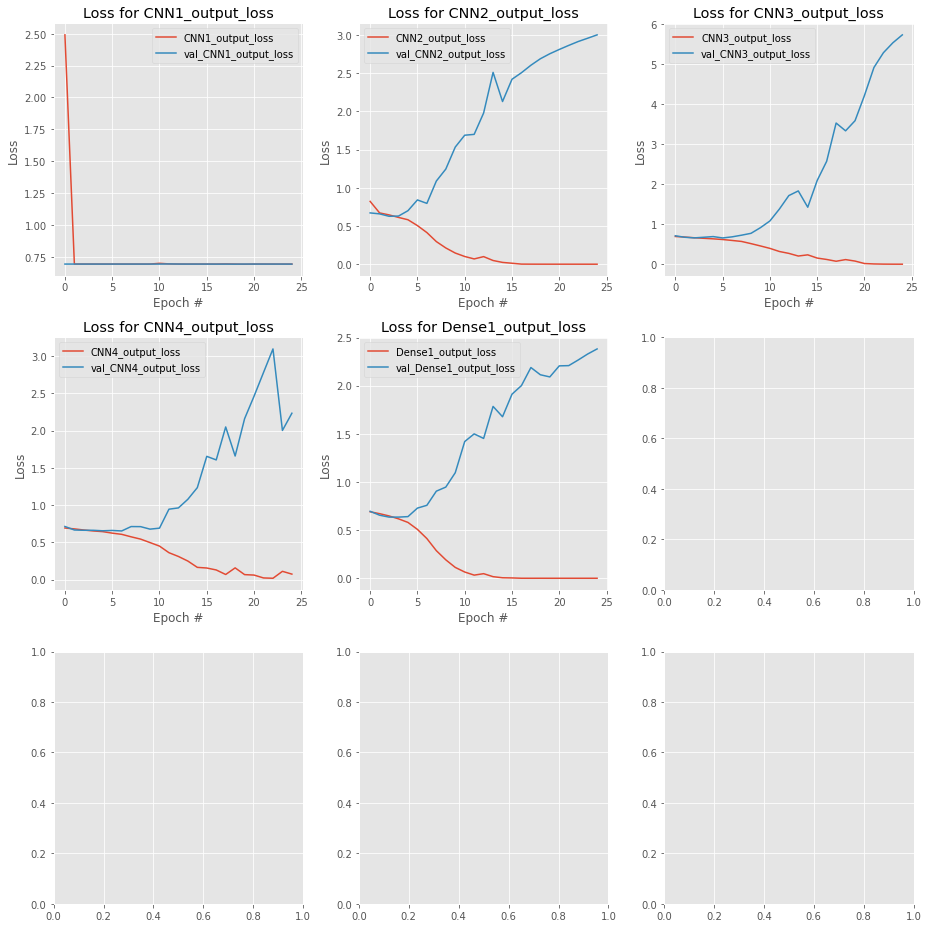

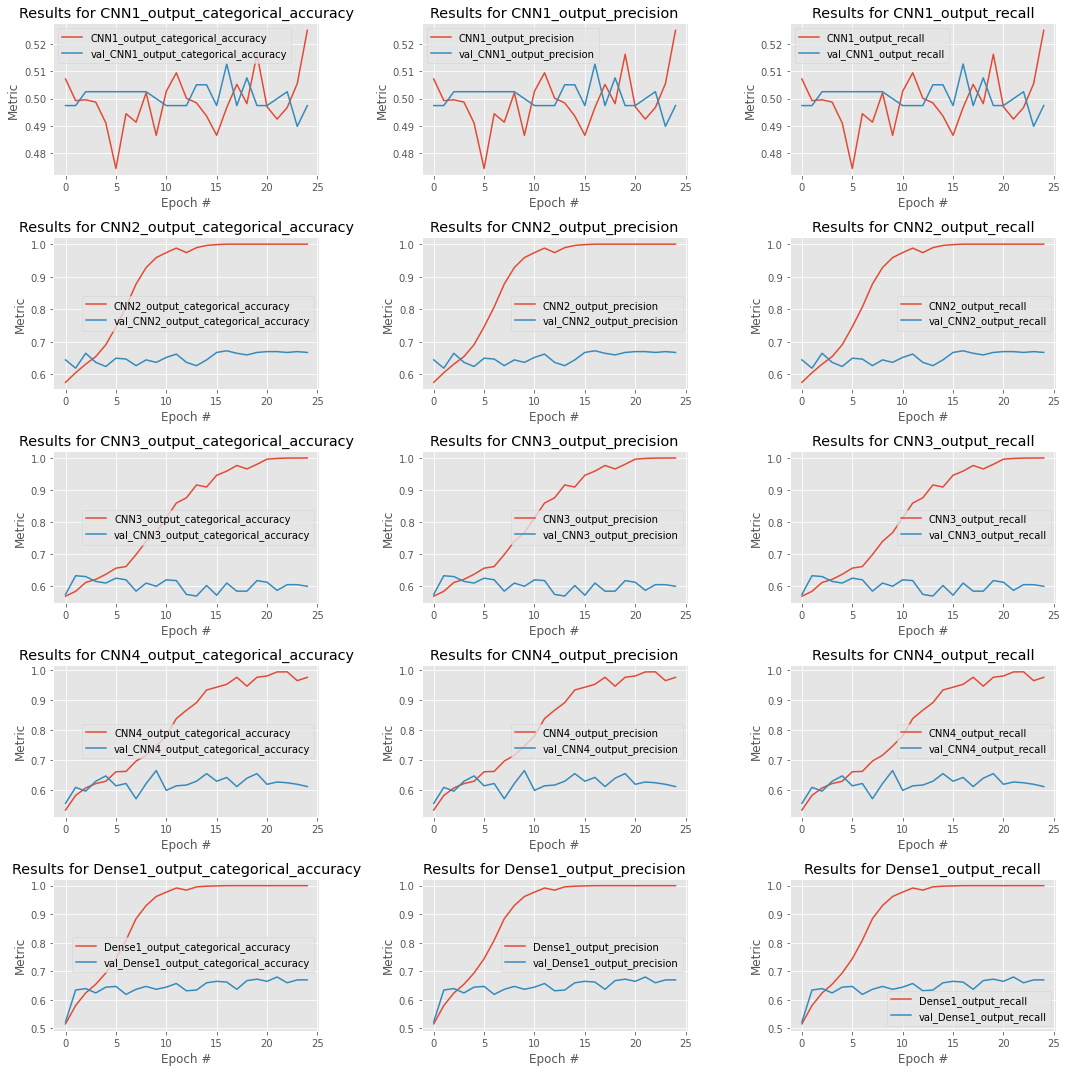

In [17]:
#Second try with multiple output
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import metrics

#Model
class StateFusion:
	@staticmethod
	def build_CNN1(inputs, numCategories,p,
	activationType="softmax", chanDim=-1):
		x = tf.keras.layers.Conv2D(50, (1,30), activation='relu')(inputs)
		x = tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
		x = tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x = tf.keras.layers.Flatten()(x)
		x = tf.keras.layers.Dense(1024, activation='relu')(x)
		list_output.append("CNN1_output")
		x = tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
		return x
	
	@staticmethod
	def build_CNN2(inputs, numCategories,p, activationType="softmax",
	chanDim=-1):
		x=tf.keras.layers.Conv2D(50, (1,25), activation='relu')(inputs)
		x=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x= tf.keras.layers.Flatten()(x)
		x= tf.keras.layers.Dense(1024, activation='relu')(x)
		list_output.append("CNN2_output")
		x= tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
		return x

	@staticmethod
	def build_CNN3(inputs, numCategories,p, activationType="softmax",
	chanDim=-1):
		x=tf.keras.layers.Conv2D(50, (1,20), activation='relu')(inputs)
		x=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x= tf.keras.layers.Flatten()(x)
		x= tf.keras.layers.Dense(1024, activation='relu')(x)
		list_output.append("CNN3_output")
		x= tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
		return x


	@staticmethod
	def build_CNN4(inputs, numCategories,p, activationType="softmax",
	chanDim=-1):
		x=tf.keras.layers.Conv2D(50, (1,10), activation='relu')(inputs)
		x=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
		x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
		x= tf.keras.layers.Flatten()(x)
		x= tf.keras.layers.Dense(1024, activation='relu')(x)
		list_output.append("CNN4_output")
		x= tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
		return x

	@staticmethod
	def build_dense1(inputs,numCategories,p,activationType="softmax",
	chanDim=-1):
		x=tf.keras.layers.Dense(256, activation='relu')(inputs)
		x=tf.keras.layers.Dense(128, activation='relu')(x)
		list_output.append("Dense1_output")
		x= tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
		return x


	@staticmethod
	def build_autoencoder1(inputs,numCategories,p,activationType="softmax",chanDim=-1):
		x=tf.keras.layers.Dense(64, activation='relu')(inputs)
		x=tf.keras.layers.Dense(32, activation='relu')(x)
		x=tf.keras.layers.Dense(16, activation='relu')(inputs)
		x=tf.keras.layers.Dense(32, activation='relu')(x)
		x=tf.keras.layers.Dense(64, activation='relu')(x)
		list_output.append("Autoencoder1_output")
		x= tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
		return x


	@staticmethod
	def build( numCategories,
	 										activationType="softmax"):
		# initialize the input shape and channel dimension (this code
		# assumes you are using TensorFlow which utilizes channels
		# last ordering)
		inputShape =(np.shape(X_train[:,:,:,np.newaxis])[1:])
		# construct both the "category" and "color" sub-networks
		inputs = tf.keras.layers.Input(shape=inputShape, name='motor_imagery')
		chanDim = -1
		
		p=0
		CNN1 = StateFusion.build_CNN1(inputs,
			numCategories,p, activationType=activationType, chanDim=chanDim)
		p=1
		CNN2 = StateFusion.build_CNN2(inputs,
			numCategories,p, activationType=activationType, chanDim=chanDim)
		p=2
		CNN3 = StateFusion.build_CNN3(inputs,
			numCategories,p, activationType=activationType, chanDim=chanDim)
		p=3
		CNN4 = StateFusion.build_CNN4(inputs,
			numCategories,p, activationType=activationType, chanDim=chanDim)
	
		x= tf.keras.layers.concatenate(
    inputs=[CNN1,CNN2,CNN3,CNN4], axis=-1)
		p=4

		Dense1= StateFusion.build_dense1(x,numCategories,p,activationType=activationType, chanDim=chanDim)
		#Autoencoder1= StateFusion.build_autoencoder1(x,numCategories,p,activationType=activationType, chanDim=chanDim)
		# create the model using our input (the batch of images) and
		# two separate outputs -- one for the clothing category
		# branch and another for the color branch, respectively
		model = tf.keras.Model(
				inputs=inputs,
			outputs=[CNN1,CNN2,CNN3,CNN4,Dense1],
			name="neurak")
		# return the constructed network architecture
		return model,p







(unique, counts) = np.unique(y_train, return_counts=True)
# initialize our StateFusion multi-output network
list_output=[]

model,p = StateFusion.build(
	numCategories=np.shape(unique)[0],
	activationType="softmax")

model.summary()
# define two dictionaries: one that specifies the loss method for
# each output of the network along with a second dictionary that
# specifies the weight per loss
losses = {
	list_output[0]: "categorical_crossentropy",
	list_output[1]: "categorical_crossentropy",
	list_output[2]: "categorical_crossentropy",
	list_output[3]: "categorical_crossentropy",
	list_output[4]: "categorical_crossentropy",
}




# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.10)

# Shuffle
train_ds = tf.data.Dataset.from_tensor_slices((X_train, {list_output[0]:y_train,list_output[1]:y_train,list_output[2]:y_train,list_output[3]:y_train,list_output[4]:y_train})).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, {"output_1":y_test,"output_2":y_test,"output_3":y_test,"output_4":y_test,"output_5":y_test})).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, {list_output[0]:y_test,list_output[1]:y_test,list_output[2]:y_test,list_output[3]:y_test,list_output[4]:y_test})).batch(32)






lossWeights = {list_output[0]: 1.0, list_output[1]: 1.0, list_output[2]: 1.0, list_output[3]: 1.0}
# initialize the optimizer and compile the model
print("[INFO] compiling model...")
Epochs = int(input("Enter the number of epochs : ") )
INIT_LR=1e-3
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=INIT_LR / Epochs)
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,
	metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

"""
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.10)

# Shuffle
train_ds = tf.data.Dataset.from_tensor_slices((X_train, {list_output[0]:y_train,list_output[1]:y_train,list_output[2]:y_train,list_output[3]:y_train})).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, {"output_1":y_test,"output_2":y_test,"output_3":y_test,"output_4":y_test})).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, {list_output[0]:y_test,list_output[1]:y_test,list_output[2]:y_test,list_output[3]:y_test})).batch(32)
"""


from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#checkpoint,
#callbacks_list = [tensorboard_callback]

# train the network to perform multi-output classification
print(test_ds)
H = model.fit(
	train_ds,
	validation_data=test_ds,
	epochs=Epochs,
###      callbacks=callbacks_list,
	verbose=1)
# save the model to disk
print("[INFO] serializing network...")
#model.save(args["model"])



"""
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#checkpoint,
#callbacks_list = [tensorboard_callback]

history = model.fit(
      train_ds,
      epochs=13,
      validation_data=test_ds,
###      callbacks=callbacks_list,
      verbose=1)
"""



# plot the total loss, category loss, and color loss
lossTotal=["loss"]
plt.style.use("ggplot")

for (i, l) in enumerate(lossTotal):
  plt.figure(figsize=(14, 7))
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  plt.title(title)
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.plot(np.arange(0, Epochs), H.history[l], label=l)
  plt.plot(np.arange(0, Epochs), H.history["val_" + l],
      label="val_" + l)
  plt.legend()
#plt.savefig("{}_TotalLosss.png".format(args["plot"]))
#plt.close()


lossNames = []
for e,r in enumerate(losses):
  lossNames.append(r+"_loss")
plt.style.use("ggplot")

p=p+1
ph1=p/3
ph2=p%3
(fig, ax) = plt.subplots(int(ph1+ph2), 3, figsize=(13, 13))
# loop over the loss names

axr=0
axc=0
for (i, l) in enumerate(lossNames):
	# plot the loss for both the training and validation data
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  ax[axr,axc].set_title(title)
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Loss")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the losses figure and create a new figure for the accuracies
plt.tight_layout()
#plt.savefig("{}_losses.png".format(args["plot"]))
#plt.close()

# create a new figure for the accuracies
MetricNames = []

ph=p
for e,r in enumerate(list(H.history.keys())):
	ph=ph+1
	print(ph)
	MetricNames.append(list(H.history.keys())[ph])
	if ph==(len(list(H.history.keys()))/2)-1:
		break

axr=0
axc=0
plt.style.use("ggplot")
(fig, ax) = plt.subplots(p,int((((len(list(H.history.keys()))/2)-1)/(p))-1) , figsize=(15, 15))
# loop over the accuracy names
for (i, l) in enumerate(MetricNames):
	# plot the loss for both the training and validation data

  ax[axr,axc].set_title("Results for {}".format(l))
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Metric")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the accuracies figure
plt.tight_layout()
#plt.savefig("{}_accs.png".format(args["plot"]))
#plt.close()

## Functional model improved - in progress

In [ ]:

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import metrics

#Model
class StateFusion:
  @staticmethod
  def build_CNN1(inputs, numCategories,p,
  activationType="softmax", chanDim=-1):
    x = tf.keras.layers.Conv2D(50, (1,30), activation='relu')(inputs)
    x = tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    return x

  @staticmethod
  def build_CNN2(inputs, numCategories,p, activationType="softmax",
  chanDim=-1):
    x=tf.keras.layers.Conv2D(50, (1,25), activation='relu')(inputs)
    x=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)

    return x

  @staticmethod
  def build_CNN3(inputs, numCategories,p, activationType="softmax",
  chanDim=-1):
    x=tf.keras.layers.Conv2D(50, (1,20), activation='relu')(inputs)
    x=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    return x


  @staticmethod
  def build_CNN4(inputs, numCategories,p, activationType="softmax",
  chanDim=-1):
    x=tf.keras.layers.Conv2D(50, (1,10), activation='relu')(inputs)
    x=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    x=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x)
    x= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
    return x

  @staticmethod
  def build_dense1(inputs,numCategories,p,activationType="softmax",
  chanDim=-1):
    x=tf.keras.layers.Dense(256, activation='relu')(inputs)
    x=tf.keras.layers.Dense(128, activation='relu')(x)
    list_output.append("Dense1_output")
    x= tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
    return x


  @staticmethod
  def build_autoencoder1(inputs,numCategories,p,activationType="softmax",chanDim=-1):
    x=tf.keras.layers.Dense(64, activation='relu')(inputs)
    x=tf.keras.layers.Dense(32, activation='relu')(x)
    x=tf.keras.layers.Dense(16, activation='relu')(inputs)
    x=tf.keras.layers.Dense(32, activation='relu')(x)
    x=tf.keras.layers.Dense(64, activation='relu')(x)
    list_output.append("Autoencoder1_output")
    x= tf.keras.layers.Dense(numCategories, activation=activationType,name=list_output[p])(x)
    return x

  @staticmethod
  def build_LTSM(inputs):
    x=tf.keras.layers.LSTM(25, return_sequences=True,activation='tanh', recurrent_activation='tanh',dropout=0.2,recurrent_dropout=0.2)(inputs)
    x=tf.keras.layers.LSTM(25, return_sequences=True,activation='tanh', recurrent_activation='tanh',dropout=0.2,recurrent_dropout=0.2)(x)
    x=tf.keras.layers.LSTM(units=25)(x)
    return x

  @staticmethod
  def build( numCategories,activationType="softmax"):
    # initialize the input shape and channel dimension (this code
    # assumes you are using TensorFlow which utilizes channels
    # last ordering)
    inputShape =(np.shape(X_train[:,:,:,np.newaxis])[1:])
    # construct both the "category" and "color" sub-networks
    inputs = tf.keras.layers.Input(shape=inputShape, name='motor_imagery')
    chanDim = -1

    #p=0
    CNN1 = StateFusion.build_CNN1(inputs,
      numCategories,p, activationType=activationType, chanDim=chanDim)
    #p=1
    CNN2 = StateFusion.build_CNN2(inputs,
      numCategories,p, activationType=activationType, chanDim=chanDim)
    #p=2
    CNN3 = StateFusion.build_CNN3(inputs,
      numCategories,p, activationType=activationType, chanDim=chanDim)
    #p=3
    CNN4 = StateFusion.build_CNN4(inputs,numCategories,p, activationType=activationType, chanDim=chanDim)

    sCNN1=tf.shape(CNN1)[0]
    sCNN2=tf.shape(CNN2)[0]
    sCNN3=tf.shape(CNN3)[0]
    sCNN4=tf.shape(CNN4)[0]
    print(sCNN1)
    @tf.function
    CNN1=tf.keras.layers.Reshape((sCNN1,-1))(CNN1)
    CNN2=tf.keras.layers.Reshape((sCNN2,-1))(CNN2)
    CNN3=tf.keras.layers.Reshape((sCNN3,-1))(CNN3)
    CNN4=tf.keras.layers.Reshape((sCNN4,-1))(CNN4)

    CNN1=StateFusion.build_LTSM(CNN1)
    CNN2=StateFusion.build_LTSM(CNN2)
    CNN3=StateFusion.build_LTSM(CNN3)
    CNN4=StateFusion.build_LTSM(CNN4)
    x= tf.keras.layers.concatenate(
    inputs=[CNN1,CNN2,CNN3,CNN4], axis=-1)
    #p=4


    Dense1= StateFusion.build_dense1(x,numCategories,p,activationType=activationType, chanDim=chanDim)
    #Autoencoder1= StateFusion.build_autoencoder1(x,numCategories,p,activationType=activationType, chanDim=chanDim)
    # create the model using our input (the batch of images) and
    # two separate outputs -- one for the clothing category
    # branch and another for the color branch, respectively
    model = tf.keras.Model(
        inputs=inputs,
      outputs=[CNN1,CNN2,CNN3,CNN4,Dense1],
      name="neurak")
    # return the constructed network architecture
    return model,p







(unique, counts) = np.unique(y_train, return_counts=True)
# initialize our StateFusion multi-output network
list_output=[]

model,p = StateFusion.build(
	numCategories=np.shape(unique)[0],
	activationType="softmax")

model.summary()
# define two dictionaries: one that specifies the loss method for
# each output of the network along with a second dictionary that
# specifies the weight per loss
losses = {
	list_output[0]: "categorical_crossentropy",
	list_output[1]: "categorical_crossentropy",
	list_output[2]: "categorical_crossentropy",
	list_output[3]: "categorical_crossentropy",
	list_output[4]: "categorical_crossentropy",
}




# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.10)

# Shuffle
train_ds = tf.data.Dataset.from_tensor_slices((X_train, {list_output[0]:y_train,list_output[1]:y_train,list_output[2]:y_train,list_output[3]:y_train,list_output[4]:y_train})).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, {"output_1":y_test,"output_2":y_test,"output_3":y_test,"output_4":y_test,"output_5":y_test})).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, {list_output[0]:y_test,list_output[1]:y_test,list_output[2]:y_test,list_output[3]:y_test,list_output[4]:y_test})).batch(32)






lossWeights = {list_output[0]: 1.0, list_output[1]: 1.0, list_output[2]: 1.0, list_output[3]: 1.0}
# initialize the optimizer and compile the model
print("[INFO] compiling model...")
Epochs = int(input("Enter the number of epochs : ") )
INIT_LR=1e-3
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=INIT_LR / Epochs)
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,
	metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

"""
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.10)

# Shuffle
train_ds = tf.data.Dataset.from_tensor_slices((X_train, {list_output[0]:y_train,list_output[1]:y_train,list_output[2]:y_train,list_output[3]:y_train})).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, {"output_1":y_test,"output_2":y_test,"output_3":y_test,"output_4":y_test})).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, {list_output[0]:y_test,list_output[1]:y_test,list_output[2]:y_test,list_output[3]:y_test})).batch(32)
"""


from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#checkpoint,
#callbacks_list = [tensorboard_callback]

# train the network to perform multi-output classification
print(test_ds)
H = model.fit(
	train_ds,
	validation_data=test_ds,
	epochs=Epochs,
###      callbacks=callbacks_list,
	verbose=1)
# save the model to disk
print("[INFO] serializing network...")
#model.save(args["model"])



"""
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#checkpoint,
#callbacks_list = [tensorboard_callback]

history = model.fit(
      train_ds,
      epochs=13,
      validation_data=test_ds,
###      callbacks=callbacks_list,
      verbose=1)
"""



# plot the total loss, category loss, and color loss
lossTotal=["loss"]
plt.style.use("ggplot")

for (i, l) in enumerate(lossTotal):
  plt.figure(figsize=(14, 7))
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  plt.title(title)
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.plot(np.arange(0, Epochs), H.history[l], label=l)
  plt.plot(np.arange(0, Epochs), H.history["val_" + l],
      label="val_" + l)
  plt.legend()
#plt.savefig("{}_TotalLosss.png".format(args["plot"]))
#plt.close()


lossNames = []
for e,r in enumerate(losses):
  lossNames.append(r+"_loss")
plt.style.use("ggplot")

p=p+1
ph1=p/3
ph2=p%3
(fig, ax) = plt.subplots(int(ph1+ph2), 3, figsize=(13, 13))
# loop over the loss names

axr=0
axc=0
for (i, l) in enumerate(lossNames):
	# plot the loss for both the training and validation data
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  ax[axr,axc].set_title(title)
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Loss")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the losses figure and create a new figure for the accuracies
plt.tight_layout()
#plt.savefig("{}_losses.png".format(args["plot"]))
#plt.close()

# create a new figure for the accuracies
MetricNames = []

ph=p
for e,r in enumerate(list(H.history.keys())):
	ph=ph+1
	print(ph)
	MetricNames.append(list(H.history.keys())[ph])
	if ph==(len(list(H.history.keys()))/2)-1:
		break

axr=0
axc=0
plt.style.use("ggplot")
(fig, ax) = plt.subplots(p,int((((len(list(H.history.keys()))/2)-1)/(p))-1) , figsize=(15, 15))
# loop over the accuracy names
for (i, l) in enumerate(MetricNames):
	# plot the loss for both the training and validation data

  ax[axr,axc].set_title("Results for {}".format(l))
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Metric")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the accuracies figure
plt.tight_layout()
#plt.savefig("{}_accs.png".format(args["plot"]))
#plt.close()

SyntaxError: ignored

In [ ]:
#for third attempts shoter model
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import metrics





#@tf.function
inputs = tf.keras.layers.Input(shape=(64,640,1), name='img')
x = tf.keras.layers.Conv2D(128, (4,4), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((4,4))(x)
x = tf.keras.layers.Conv2D(64, (2,2), activation='relu')(x)
x = tf.keras.layers.Permute((2, 1,3))(x)
x = tf.keras.layers.Reshape((x.shape[1],-1))(x)
x = tf.keras.layers.LSTM(25, return_sequences=True,activation='tanh', recurrent_activation='tanh',dropout=0.2,recurrent_dropout=0.2)(x)
x = tf.keras.layers.LSTM(25, return_sequences=True,activation='tanh', recurrent_activation='tanh',dropout=0.2,recurrent_dropout=0.2)(x)
x = tf.keras.layers.LSTM(units=25)(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=inputs, outputs=[x], name='neurak')
model.summary()



from sklearn.decomposition import PCA 
# PCA
#x_train = StandardScaler().fit_transform(X1)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
# Reshape
x_train = principalDf.values.reshape(6288, 125, 4)
df=pd.DataFrame(y_train)
y_train=df.iloc[::125, :]


# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.10,random_state=2)

# Shuffle
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])


from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#checkpoint,
#callbacks_list = [tensorboard_callback]

history = model.fit(
      train_ds,
      epochs=13,
      validation_data=test_ds,
###      callbacks=callbacks_list,
      verbose=1)



Model: "neurak"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 64, 640, 1)]      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 61, 637, 128)      2176      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 159, 128)      0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 14, 158, 64)       32832     
_________________________________________________________________
permute_12 (Permute)         (None, 158, 14, 64)       0         
_________________________________________________________________
reshape_15 (Reshape)         (None, 158, 896)          0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 158, 25)           92200

ValueError: ignored

In [ ]:
X1.shape

(1377, 64, 640)

In [ ]:
graph_def = sess.graph.as_graph_def(add_shapes=True)
shapes = model.attr['_output_shapes'] 
shapes.list.shape[0].dim[0].size

NameError: ignored

In [ ]:
print("[INFO] compiling model...")
Epochs = int(input("Enter the number of epochs : ") )
INIT_LR=1e-3
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=INIT_LR / (Epochs**2))
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,
	metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])
H = model.fit(
	train_ds,
	validation_data=test_ds,
	epochs=Epochs,
###      callbacks=callbacks_list,
	verbose=1)

[INFO] compiling model...
Enter the number of epochs : 10
Epoch 1/10
40/40 [==============================] - 85s 2s/step - loss: 1.1278 - CNN1_output_loss: 0.0798 - CNN2_output_loss: 0.1167 - CNN3_output_loss: 0.1798 - CNN4_output_loss: 0.6912 - Autoencoder1_output_loss: 0.0603 - CNN1_output_categorical_accuracy: 0.9713 - CNN1_output_precision_2: 0.9713 - CNN1_output_recall_2: 0.9713 - CNN2_output_categorical_accuracy: 0.9530 - CNN2_output_precision_2: 0.9530 - CNN2_output_recall_2: 0.9530 - CNN3_output_categorical_accuracy: 0.9235 - CNN3_output_precision_2: 0.9235 - CNN3_output_recall_2: 0.9235 - CNN4_output_categorical_accuracy: 0.4980 - CNN4_output_precision_2: 0.4980 - CNN4_output_recall_2: 0.4980 - Autoencoder1_output_categorical_accuracy: 0.9817 - Autoencoder1_output_precision_2: 0.9817 - Autoencoder1_output_recall_2: 0.9817 - val_loss: 3.3001 - val_CNN1_output_loss: 0.7684 - val_CNN2_output_loss: 0.7702 - val_CNN3_output_loss: 0.5265 - val_CNN4_output_loss: 0.7035 - val_Autoenc

In [ ]:
model.save("cnn4strage")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn4strage/assets


In [ ]:
!ls -l "cnn4strage"

total 755
drwx------ 2 root root   4096 Aug 17 13:19 assets
-rw------- 1 root root 763942 Aug 17 13:19 saved_model.pb
drwx------ 2 root root   4096 Aug 17 13:19 variables


In [ ]:
!du -sh "cnn4strage/variables/variables.data-00000-of-00001"

2.2G	cnn4strage/variables/variables.data-00000-of-00001


In [ ]:
p=4

In [ ]:
# plot the total loss, category loss, and color loss
lossTotal=["loss"]
plt.style.use("ggplot")

for (i, l) in enumerate(lossTotal):
  plt.figure(figsize=(14, 7))
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  plt.title(title)
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.plot(np.arange(0, Epochs), H.history[l], label=l)
  plt.plot(np.arange(0, Epochs), H.history["val_" + l],
      label="val_" + l)
  plt.legend()
plt.savefig("{}{}_TotalLosss.png".format(main_dict["path_plots"][0],main_dict["current_seed"]))
plt.close()


lossNames = []
for e,r in enumerate(losses):
  lossNames.append(r+"_loss")
plt.style.use("ggplot")

p=p+1
ph1=p/3
ph2=p%3
(fig, ax) = plt.subplots(int(ph1+ph2), 3, figsize=(13, 13))
# loop over the loss names

axr=0
axc=0
for (i, l) in enumerate(lossNames):
	# plot the loss for both the training and validation data
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  ax[axr,axc].set_title(title)
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Loss")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the losses figure and create a new figure for the accuracies
plt.tight_layout()
plt.savefig("{}{}_losses.png".format(main_dict["path_plots"][0],main_dict["current_seed"]))
plt.close()

# create a new figure for the accuracies
MetricNames = []

ph=np.copy(p)
for e,r in enumerate(list(H.history.keys())):
	ph=ph+1
	print(ph)
	MetricNames.append(list(H.history.keys())[ph])
	if ph==(len(list(H.history.keys()))/2)-1:
		break

axr=0
axc=0
plt.style.use("ggplot")
(fig, ax) = plt.subplots(p,int((((len(list(H.history.keys()))/2)-1)/(p))-1) , figsize=(15, 15))
# loop over the accuracy names
for (i, l) in enumerate(MetricNames):
	# plot the loss for both the training and validation data

  ax[axr,axc].set_title("Results for {}".format(l))
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Metric")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the accuracies figure
plt.tight_layout()
plt.savefig("{}{}_accs.png".format(main_dict["path_plots"][0],main_dict["current_seed"]))
plt.close()

6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


## Save plots

In [ ]:
p=p-1
print("{}{}_TotalLosss.png".format(main_dict["path_plots"][0],main_dict["current_seed"]))

/content/drive/My Drive/matlab/filterlarger/plots/4196-2020-08-17_TotalLosss.png


IndexError: ignored

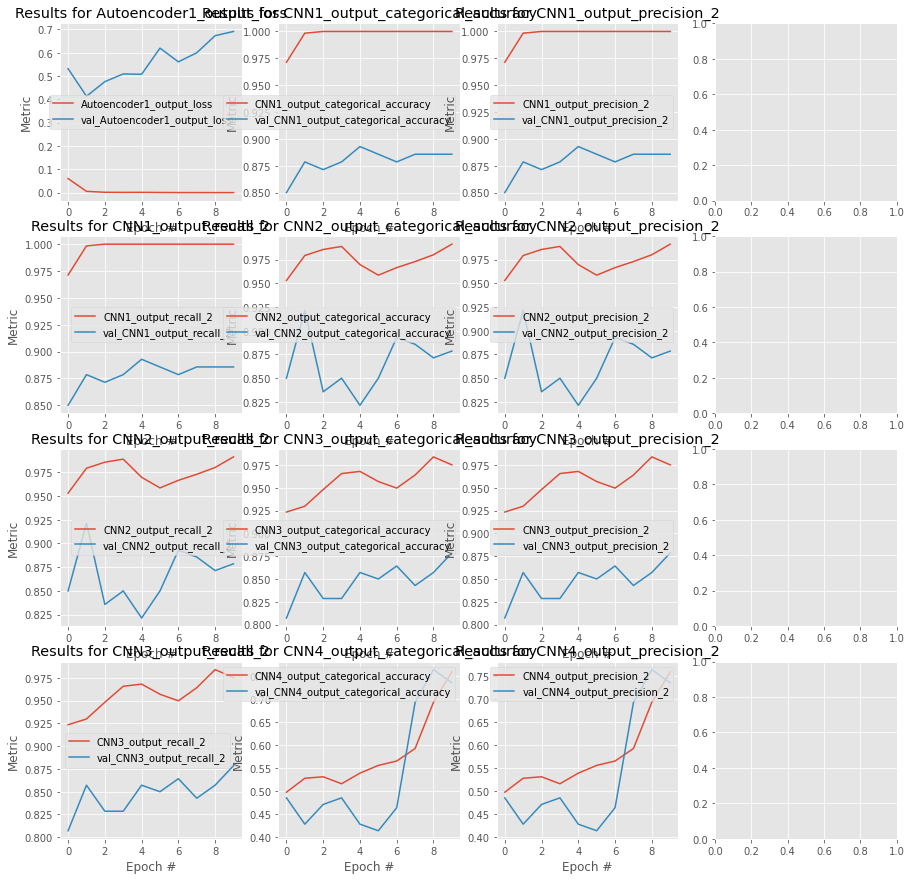

In [ ]:
# This is for saving plots


# plot the total loss, category loss, and color loss
lossTotal=["loss"]
plt.style.use("ggplot")

for (i, l) in enumerate(lossTotal):
  plt.figure(figsize=(14, 7))
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  plt.title(title)
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.plot(np.arange(0, Epochs), H.history[l], label=l)
  plt.plot(np.arange(0, Epochs), H.history["val_" + l],
      label="val_" + l)
  plt.legend()
plt.savefig("{}{}_TotalLosss.png".format(main_dict["path_plots"][0],main_dict["current_seed"]))
plt.close()


lossNames = []
for e,r in enumerate(losses):
  lossNames.append(r+"_loss")
plt.style.use("ggplot")

#p=p+1
ph1=(p+1)/3
ph2=(p+1)%3
(fig, ax) = plt.subplots(int(ph1+ph2), 3, figsize=(13, 13))
# loop over the loss names

axr=0
axc=0
for (i, l) in enumerate(lossNames):
	# plot the loss for both the training and validation data
  title = "Loss for {}".format(l) if l != "loss" else "Total loss"
  ax[axr,axc].set_title(title)
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Loss")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the losses figure and create a new figure for the accuracies
plt.tight_layout()
plt.savefig("{}{}_losses.png".format(main_dict["path_plots"][0],main_dict["current_seed"]))
plt.close()

# create a new figure for the accuracies
MetricNames = []

ph=p+1
for e,r in enumerate(list(H.history.keys())):
	ph=ph+1
	MetricNames.append(list(H.history.keys())[ph])
	if ph==(len(list(H.history.keys()))/2)-1:
		break

axr=0
axc=0
plt.style.use("ggplot")
(fig, ax) = plt.subplots(p+1,int((((len(list(H.history.keys()))/2)-1)/(p+1))-1) , figsize=(15, 15))
# loop over the accuracy names
for (i, l) in enumerate(MetricNames):
	# plot the loss for both the training and validation data

  ax[axr,axc].set_title("Results for {}".format(l))
  ax[axr,axc].set_xlabel("Epoch #")
  ax[axr,axc].set_ylabel("Metric")
  ax[axr,axc].plot(np.arange(0, Epochs), H.history[l], label=l)
  ax[axr,axc].plot(np.arange(0, Epochs), H.history["val_" + l],
		label="val_" + l)
  ax[axr,axc].legend()
  axc=axc+1
  if axc==3:
    axr=axr+1
    axc=0
# save the accuracies figure
plt.tight_layout()
plt.savefig("{}{}_accs.png".format(main_dict["path_plots"][0],main_dict["current_seed"]))
plt.close()
"""
#Works only for single output
from tensorflow.keras.utils import plot_model
saveplace='{}{}_summary.png'.format(main_dict["path_plots"][0],main_dict["current_seed"])
print(saveplace)
plot_model(model, to_file=saveplace)
"""

## Calculate vram needed - in progress
Not working yet

In [ ]:
#Calculate vram needeed

def get_model_memory_usage(batch_size, model):
    import numpy as np
    from keras import backend as K

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        for s in l.output_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in set(model.trainable_weights)])
    non_trainable_count = np.sum([K.count_params(p) for p in set(model.non_trainable_weights)])

    number_size = 4.0
    if K.floatx() == 'float16':
         number_size = 2.0
    if K.floatx() == 'float64':
         number_size = 8.0

    total_memory = number_size*(batch_size*shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes

get_model_memory_usage(32,model)


TypeError: ignored

##Other reports methods and summary plot
Not working yet

In [ ]:
!pip install keract

     |████████████████████████████████| 378kB 10.3MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [ ]:

from keract import get_activations
activations = get_activations(model, ac)
from keract import display_activations
display_activations(activations, save=False)

In [ ]:
model.predict(ac)

array([[0.49253753, 0.50746244]], dtype=float32)

In [ ]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
# list all data in history
#print(history.history.keys())

#Delete model
tf.keras.backend.clear_session()

In [ ]:

import plotly as py
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import time as dt_tm
from datetime import date as dt_date

import chart_studio.plotly as py
import plotly.tools as plotly_tools
from plotly.graph_objs import *

import os
import tempfile
os.environ['MPLCONFIGDIR'] = tempfile.mkdtemp()
from matplotlib.finance import quotes_historical_yahoo
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

from IPython.display import HTML

py.sign_in("jackp", "XXXX")


### Step 1: Generate 2 graphs and 2 tables for report with Plotly Python client

#### First graph: 2014 Apple stock data with moving average

# Let's grab Apple stock data using the <a href="http://matplotlib.org/api/finance_api.html">matplotlib finance</a> model from 2014, then take a moving average with a <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html">numpy convolution</a>.

# In[154]:

x = []
y = []
ma = []

def moving_average(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

date1 = dt_date( 2014, 1, 1 )
date2 = dt_date( 2014, 12, 12 )
quotes = quotes_historical_yahoo('AAPL', date1, date2)
if len(quotes) == 0:
    print ("Couldn't connect to yahoo trading database")
else:
    dates = [q[0] for q in quotes]
    y = [q[1] for q in quotes]
    for date in dates:
        x.append(datetime.fromordinal(int(date))                .strftime('%Y-%m-%d')) # Plotly timestamp format
    ma = moving_average(y, 10)


# Now graph the data with Plotly. See here for Plotly's <a href="https://plot.ly/python/line-and-scatter/">line plot syntax</a> and here for <a href="https://plot.ly/python/getting-started/">getting started</a> with the Plotly Python client.

# In[155]:

xy_data = Scatter( x=x, y=y, mode='markers', marker=Marker(size=4), name='AAPL' )
# vvv clip first and last points of convolution
mov_avg = Scatter( x=x[5:-4], y=ma[5:-4],                   line=Line(width=2,color='red',opacity=0.5), name='Moving average' )
data = Data([xy_data, mov_avg])

py.iplot(data, filename='apple stock moving average')


# Save the plot URL - we'll use it when generating the report later.

# In[157]:

first_plot_url = py.plot(data, filename='apple stock moving average', auto_open=False,)
print (first_plot_url)


#### Second graph: Scatter matrix of 2014 technology and CPG stocks

# Let's use the Pandas package and Plotly subplots to compare different tech. and CPG stocks in 2014.<br>
# This graph was inspired by <a href="http://nbviewer.ipython.org/github/twiecki/financial-analysis-python-tutorial/blob/master/1.%20Pandas%20Basics.ipynb">this IPython notebook</a> and GitHub user <a href="https://github.com/twiecki">twiecki</a>.

# In[5]:

tickers = ['AAPL', 'GE', 'IBM', 'KO', 'MSFT', 'PEP']
prices = []
for ticker in tickers:
    quotes = quotes_historical_yahoo(ticker, date1, date2)
    prices.append( [q[1] for q in quotes] )


# We have all the stock prices in a list of lists - use the code snippet below to convert this into a Pandas dataframe.

# In[6]:

df = pd.DataFrame( prices ).transpose()
df.columns = tickers
df.head()


# Use Plotly's <a href="https://plot.ly/python/overview/">get_subplots()</a> routine to generate an empty matrix of 6x6 subplots. We'll fill these in by plotting all stock ticker combinations against each other (ie, General Electric stock versus Apple stock) 

# In[122]:

fig = plotly_tools.get_subplots(rows=6, columns=6, print_grid=True, horizontal_spacing= 0.05, vertical_spacing= 0.05)


# In[143]:

def kde_scipy(x, x_grid, bandwidth=0.4, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # From https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

subplots = range(1,37)
sp_index = 0
data = []
for i in range(1,7):
    x_ticker = df.columns[i-1]
    for j in range(1,7):
        y_ticker = df.columns[j-1]
        if i==j: 
            x = df[x_ticker]
            x_grid = np.linspace(x.min(), x.max(), 100)
            sp = [ Histogram( x=x, histnorm='probability density' ),                   Scatter( x=x_grid, y=kde_scipy( x.as_matrix(), x_grid ),                           line=Line(width=2,color='red',opacity='0.5') ) ]
        else:
            sp = [ Scatter( x=df[x_ticker], y=df[y_ticker], mode='markers', marker=Marker(size=3) ) ]
        
        for ea in sp:
            ea.update( name='{0} vs {1}'.format(x_ticker,y_ticker),                      xaxis='x{}'.format(subplots[sp_index]),                      yaxis='y{}'.format(subplots[sp_index])
            )
        sp_index+=1
        data += sp

# Add x and y labels
left_index = 1
bottom_index = 1
for tk in tickers:
    fig['layout']['xaxis{}'.format(left_index)].update( title=tk )
    fig['layout']['yaxis{}'.format(bottom_index)].update( title=tk )
    left_index=left_index+1
    bottom_index=bottom_index+6
    
# Remove legend by updating 'layout' key
fig['layout'].update(showlegend=False,height=1000,width=1000, title='Major technology and CPG stock prices in 2014')
fig['data'] = Data(data)
py.iplot(fig, height=1000, width=1000, filename='Major technology and CPG stock prices in 2014 - scatter matrix')


# Save the plot URL - we'll use it when generating the report later.

# In[145]:

second_plot_url = py.plot(fig, height=1000, width=1000, auto_open=False,                          filename='Major technology and CPG stock prices in 2014 - scatter matrix')
print (second_plot_url)


#### 2 summary tables - One using Pandas and one using HTML

# First table: Use Pandas <a href="http://pandas.pydata.org/pandas-docs/version/0.15.1/generated/pandas.DataFrame.to_html.html">to_html()</a> routine to convert Pandas data frame to HTML table. Replace default table styling with <a href="http://getbootstrap.com/css">Bootstrap</a> table styling.

# In[175]:

summary_table_1 = df.describe()
summary_table_1 = summary_table_1    .to_html()    .replace('<table border="1" class="dataframe">','<table class="table table-striped">') # use bootstrap styling


# Second table: Build table as an HTML string. Use <a href="http://getbootstrap.com/css">Bootstrap</a> for table styling.

# In[135]:

summary_table_2 = '''<table class="table table-striped">
<th>Ticker</th><th>Full name</th>
<tr>
    <td>AAPL</td>
    <td><a href="http://finance.yahoo.com/q?s=AAPL">Apple Inc</a></td>
</tr>
<tr>
    <td>GE</td>
    <td><a href="http://finance.yahoo.com/q?s=GE">General Electric Company</a></td>
</tr>
<tr>
    <td>IBM</td>
    <td><a href="http://finance.yahoo.com/q?s=IBM">International Business Machines Corp.</a></td>
</tr>
<tr>
    <td>KO</td>
    <td><a href="http://finance.yahoo.com/q?s=KO">The Coca-Cola Company</a></td>
</tr>
<tr>
    <td>MSFT</td>
    <td><a href="http://finance.yahoo.com/q?s=MSFT">Microsoft Corporation</a></td>
</tr>
<tr>
    <td>PEP</td>
    <td><a href="http://finance.yahoo.com/q?s=PEP">Pepsico, Inc.</a></td>
</tr>
</table>
'''
HTML(summary_table_2)


### Step 2: Generate HTML report as a string and write to file

# This is the last step. We have all of the plots and tables that we want to include in the report - now we build an HTML string with the plots and tables embedded.<br>Notice that the <a href="http://getbootstrap.com/css">Bootstrap</a> css library is included in the &lt;head&gt; for styling.

# In[184]:

html_string = '''
<html>
    <head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head>
    <body>
        <h1>2014 technology and CPG stock prices</h1>
        <!-- *** Section 1 *** --->
        <h2>Section 1: Apple Inc. (AAPL) stock in 2014</h2>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + first_plot_url + '''.embed?width=800&height=550"></iframe>
        <p>Apple stock price rose steadily through 2014.</p>
        
        <!-- *** Section 2 *** --->
        <h2>Section 2: AAPL compared to other 2014 stocks</h2>
        <iframe width="1000" height="1000" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + second_plot_url + '''.embed?width=1000&height=1000"></iframe>
        <p>GE had the most predictable stock price in 2014. IBM had the highest mean stock price. \
The red lines are kernel density estimations of each stock price - the peak of each red lines \
corresponds to its mean stock price for 2014 on the x axis.</p>
        <h3>Reference table: stock tickers</h3>
        ''' + summary_table_2 + '''
        <h3>Summary table: 2014 stock statistics</h3>
        ''' + summary_table_1 + '''
    </body>
</html>'''


# Finally, write the html string to a local file.

# In[185]:

f = open('/home/jack/report.html','w')
f.write(html_string)
f.close()

ModuleNotFoundError: ignored

In [ ]:
!pip install chart-studio


     |████████████████████████████████| 81kB 3.9MB/s eta 0:00:011


In [ ]:

# memory footprint support libraries/code

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.2 GB  | Proc size: 1.6 GB
GPU RAM Free: 7601MB | Used: 10MB | Util   0% | Total 7611MB


In [ ]:
!kill -9 -1

In [ ]:
#Model
inputs = tf.keras.layers.Input(shape=(64,640,1), name='img')
x = tf.keras.layers.Conv2D(50, (1,30), activation='relu')(inputs)
x = tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((1,3),strides=3)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x1=tf.keras.layers.Conv2D(50, (1,25), activation='relu')(inputs)
x1=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x1)
x1= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x1)
x1=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x1)
x1= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x1)
x1= tf.keras.layers.Flatten()(x1)
x1= tf.keras.layers.Dense(1024, activation='relu')(x1)

x2=tf.keras.layers.Conv2D(50, (1,20), activation='relu')(inputs)
x2=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x2)
x2= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x2)
x2=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x2)
x2= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x2)
x2=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x2)
x2= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x2)
x2= tf.keras.layers.Flatten()(x2)
x2= tf.keras.layers.Dense(1024, activation='relu')(x2)

x3=tf.keras.layers.Conv2D(50, (1,10), activation='relu')(inputs)
x3=tf.keras.layers.Conv2D(50, (22,1), activation='relu')(x3)
x3= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x3)
x3=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x3)
x3= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x3)
x3=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x3)
x3= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x3)
x3=tf.keras.layers.Conv2D(100, (1,10), activation='relu')(x3)
x3= tf.keras.layers.MaxPooling2D((1,3),strides=3)(x3)
x3= tf.keras.layers.Flatten()(x3)
x3= tf.keras.layers.Dense(1024, activation='relu')(x3)


x= tf.keras.layers.concatenate(
    inputs=[x,x1,x2,x3], axis=-1)

outputs = tf.keras.layers.Dense(2, activation='softmax')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs, name='neurak')
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Accuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

Model: "neurak"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 64, 640, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 64, 631, 50)  550         img[0][0]                        
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 43, 631, 50)  55050       conv2d_37[0][0]                  
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 64, 621, 50)  1050        img[0][0]                        
_____________________________________________________________________________________________

Model: "neurak"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 64, 640, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 64, 631, 50)  550         img[0][0]                        
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 43, 631, 50)  55050       conv2d_37[0][0]                  
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 64, 621, 50)  1050        img[0][0]                        
_____________________________________________________________________________________________

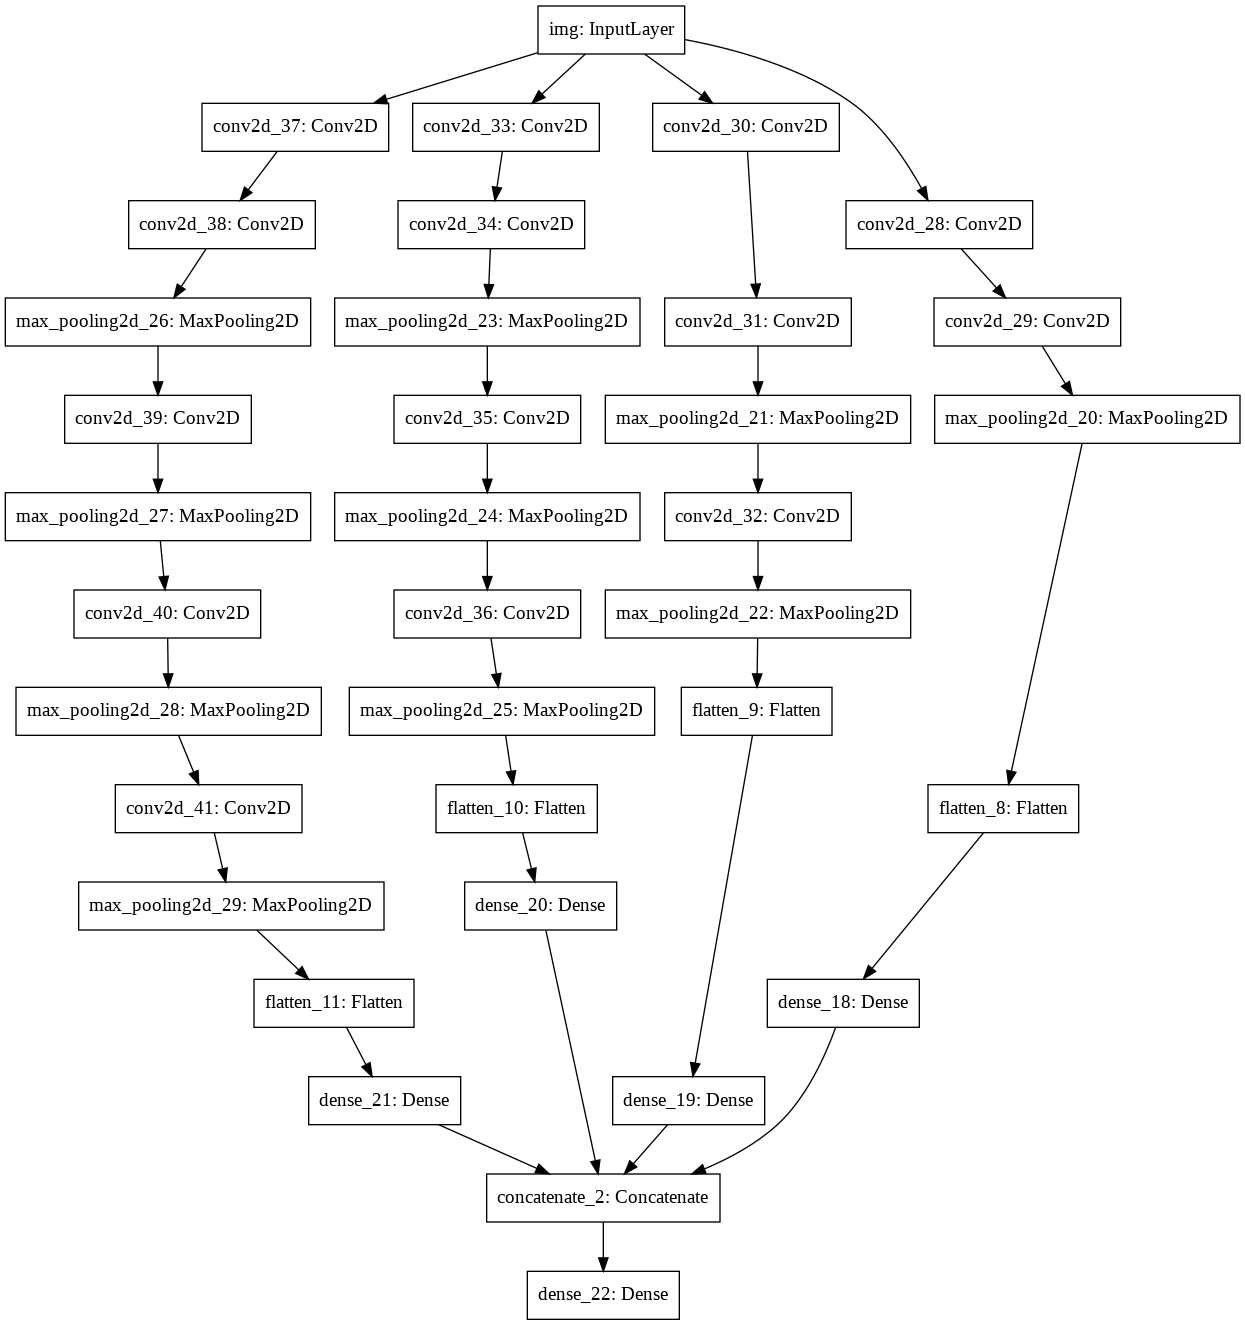

In [ ]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
import io
tmp_smry = io.StringIO()
model.summary(print_fn=lambda x: tmp_smry.write(x + '\n'))
summar = tmp_smry.getvalue()

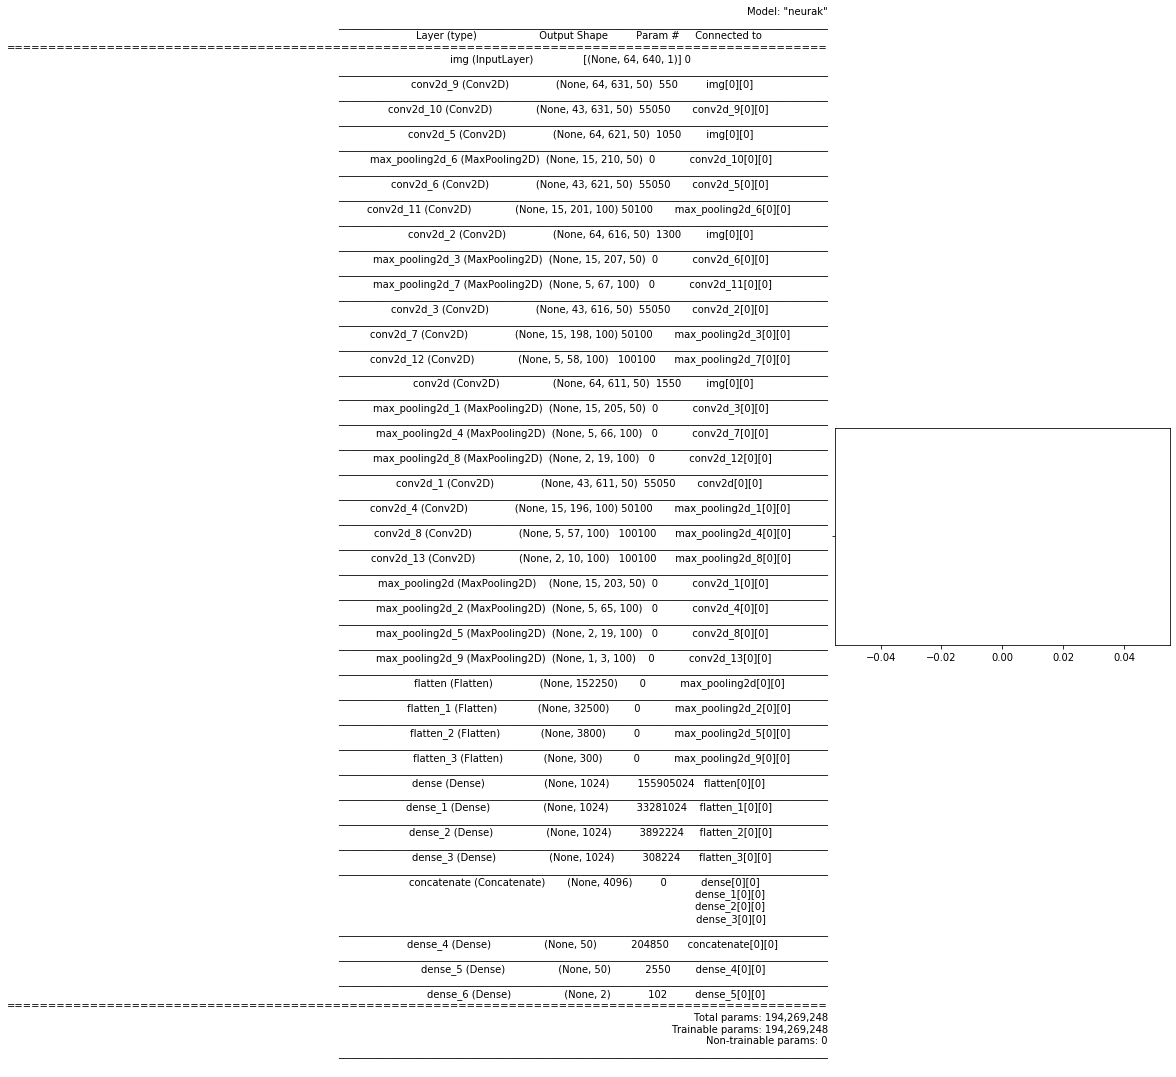

In [ ]:
plt.plot(summar)

In [ ]:
import logging
logger = logging.getLogger(__name__)

model.summary(print_fn=logger.info)

#Class model

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(80, (1,30), activation='relu')
    self.conv2 = Conv2D(80, (33,1), activation='relu')
    self.maxpool1=MaxPooling2D((1,10))
    self.conv3 = Conv2D(40, (1,30), activation='relu')
    self.conv4 = Conv2D(40, (10,10), activation='relu')
    self.maxpool2=MaxPooling2D((3,3))
    self.flatten = Flatten()
    self.d1 = Dense(80, activation='relu')
    self.d2 = Dense(2, activation='softmax')
    """
    self.ConvF1L1=Conv2D(50,(30,1), activation='relu')
    self.ConvF1L2=Conv2D(50,(1,22), activation='relu')
    self.MaxpoolF1L1=MaxPooling2D((3,1),strides=3)
    self.DenseF1L1=Dense(1024, activation='relu')
    self.DenseF1L2=Dense(2, activation='softmax')
"""
  def call(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.maxpool2(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)
  #def first(self,x):
   #x = self.ConvF1L1(x)
    #x = self.ConvF1L2(x)
    #x = self.MaxpoolF1L1(x)
    #x = self.flatten(x)
    #x = self.DenseF1L1(x)
    #return self.DenseF1L2(x)

#model1 = MyModel.first
model=MyModel()

#Train - for class model

In [ ]:
opt = optimizer
print("[INFO] training network...")
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
H = model.fit(
  X_train, y_train, batch_size=32,
  validation_data=(X_test, y_test),
	steps_per_epoch=trainX.shape[0] // 32,
	epochs=5,
	verbose=1)

In [ ]:
#Loss
loss_object = tf.keras.losses.CategoricalCrossentropy()
#Optimizer
optimizer = tf.keras.optimizers.Adam()
#Metrics for loss and accuracy
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')
#@tf.function
def train_step(model, optimizer,images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)
def test_step(model, optimizer,images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
#Set up summary writers to write the summaries to disk in a different logs directory:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

EPOCHS = 5
#tf.autograph.set_verbosity(6)
import datetime
for epoch in range(EPOCHS):
  EpochB=datetime.datetime.now()
  for images, labels in train_ds:
    TrainB=datetime.datetime.now()
    train_step(model, optimizer, images, labels)
    TrainE=datetime.datetime.now()
    TrainDuration=TrainE-TrainB
  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
  for test_images, test_labels in test_ds:
    TestB=datetime.datetime.now()
    test_step(model, optimizer,test_images, test_labels)
    TestE=datetime.datetime.now()
    TestDuration=TestE-TestB
  with test_summary_writer.as_default():
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
  EpochE=datetime.datetime.now()
  EpochDuration=EpochE-EpochB
  template = 'Epoch {}, Loss: {}, Accuracy: {}, TrainDuration: {}, Test Loss: {}, Test Accuracy: {} , TestDuration: {} , EpochDuration: {}'
  print(template.format( epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        TrainDuration,
                        test_loss.result(),
                        test_accuracy.result()*100,
                        TestDuration,
                        EpochDuration))
    # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.6789198517799377, Accuracy: 55.30863952636719, TrainDuration: 0:00:00.092781, Test Loss: 0.6744123101234436, Test Accuracy: 60.000003814697266 , TestDuration: 0:00:00.057357 , EpochDuration: 0:00:08.931910
Epoch 2, Loss: 0.6594527363777161, Accuracy: 58.2716064453125, TrainDuration: 0:00:00.098893, Test Loss: 0.6723001003265381, Test Accuracy: 53.333335876464844 , TestDuration: 0:00:00.058946 , EpochDuration: 0:00:08.902212
Epoch 3, Loss: 0.6535042524337769, Accuracy: 56.79012680053711, TrainDuration: 0:00:00.089905, Test Loss: 0.6102555394172668, Test Accuracy: 64.44444274902344 , TestDuration: 0:00:00.056941 , EpochDuration: 0:00:08.906838
Epoch 4, Loss: 0.6526864767074585, Accuracy: 55.55555725097656, TrainDuration: 0:00:00.091017, Test Loss: 0.6364157199859619, Test Accuracy: 64.44444274902344 , TestDuration: 0:00:00.058461 , EpochDuration: 0:00:08.926504
Epoch 5, Loss: 0.6429623365402222, Accuracy: 59.25925827026367, TrainDuration: 0:00:00.091848, Test Loss: 0.658

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
%tensorboard --logdir logs/gradient_tape

<IPython.core.display.Javascript object>

# Might use

In [ ]:
!pip install mne
import mne

     |████████████████████████████████| 6.6MB 2.8MB/s 


In [ ]:
#X1.plot_psd(fmax=50)
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(X1[1,:,:])
plt.imshow(X1[1,:,:], interpolation='none')
plt.show()
#raw.plot(duration=5, n_channels=30)

TypeError: ignored

In [ ]:
raw=mne.io.read_raw_edf('S001R01.edf')


Extracting EDF parameters from /content/drive/My Drive/matlab/physionet/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:

raw=mne.io.read_raw_fieldtrip('lap_imag_arrow01.mat')

TypeError: ignored

Effective window size : 8.192 (s)


<ipython-input-27-1dc845d87ac2>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=18)


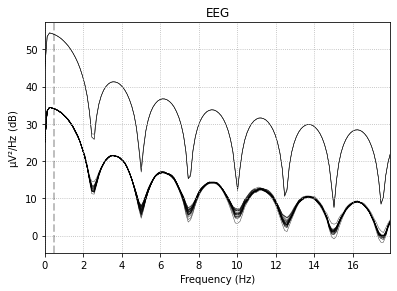

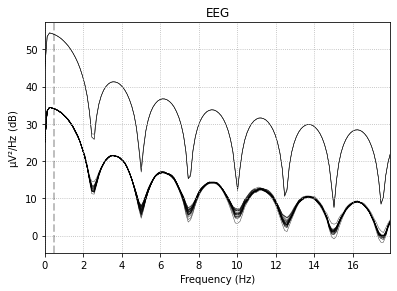

In [ ]:
raw.plot_psd(fmax=18)


In [ ]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


<ipython-input-29-c93848490c97>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=40)


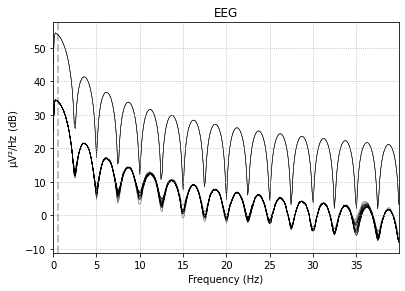

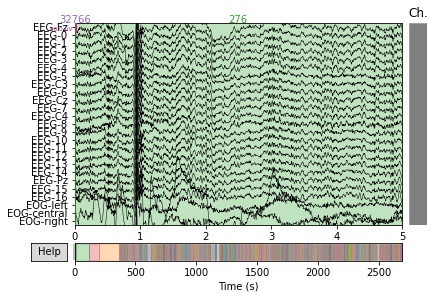

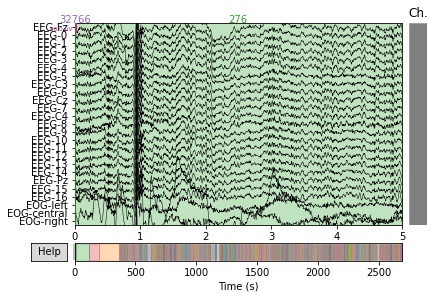

In [ ]:
#raw=r;
raw.plot_psd(fmax=40)
raw.plot(duration=5, n_channels=25)

Fitting ICA to data using 25 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 37.6s.
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-30-ee1a249b7462>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'EOG', 'EEG'}. Applying running numbers for duplicates.
  ica.plot_properties(raw, picks=ica.exclude)


RuntimeError: ignored

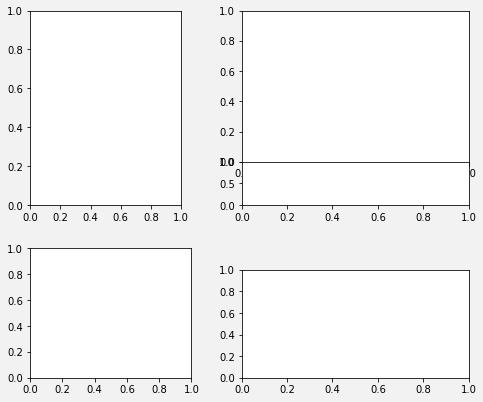

In [ ]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [ ]:
!pip install jupyter_contrib_nbextensions


     |████████████████████████████████| 20.9MB 1.3MB/s 
     |████████████████████████████████| 481kB 53.7MB/s 
     |████████████████████████████████| 870kB 51.3MB/s 
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465825 sha256=330a0a3cdcab493a324411451c4d7fe1bdf2588546a61f5f57772e2cd7b6fd3d
  Stored in directory: /root/.cache/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=f1f4589b36985037b4f18a9dd5995bd0d5cbe4418d9ea770cd85027b1223669a
  Stored in directory: /root/.cache/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
Successfully built jupyter-nbextensions-configurator jupyter-latex-envs
